Word Cloud Project

This project helps gain quick insights into the theme and/or main character of a book.

In the case of a novel, the main characters will pop up in bold letters. Also, anyu recurring topic in the novel 
is quickly visualized in words.
In the case of a textbook, the most repeated topics will be shown in big fonts.
For a religious text, the most repeated words and names can also quickle be visualized.

Common words such as prepositions and pronouns (the, or, and, he etc) which are often repeatyed in books are removd from the visualization
so as to enhance more quality words showing up.

The limitation is that the uploaded file must be a txt file.

In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing C:\Users\PC\anaconda3\lib\site-packages\fileupload\static -> fileupload
Up to date: C:\Users\PC\AppData\Roaming\jupyter\nbextensions\fileupload\extension.js
Up to date: C:\Users\PC\AppData\Roaming\jupyter\nbextensions\fileupload\widget.js
Up to date: C:\Users\PC\AppData\Roaming\jupyter\nbextensions\fileupload\fileupload\widget.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: ok


In [2]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `the hitchhiker's guide to the galaxy.txt` (279.71 kB)
Uploaded `A Likely Story.txt` (53.07 kB)


In [6]:
#the code below will display the contents of the upoaded txt file
print(file_contents)

﻿The Project Gutenberg eBook of A Likely Story, by Damon Knight

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: A Likely Story

Author: Damon Knight

Release Date: February 9, 2022 [eBook #67364]

Language: English

Produced by: Greg Weeks, Mary Meehan and the Online Distributed
             Proofreading Team at http://www.pgdp.net

*** START OF THE PROJECT GUTENBERG EBOOK A LIKELY STORY ***





                 _If you discovered a fantastic power
                 like this, you'd use it benevolently,
                   for the good of the entire human
                race--wouldn't you?

In [7]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "in", "for", "there", "not", "on", "up", "could", "out", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", "into", "then", "about", "so", "dont", "said", "now, "through"]
    
    # LEARNER CODE START HERE
    for xter in punctuations:
        file_contents = file_contents.replace(xter, "")
    file_list = file_contents.split()
    new_file_list = [x.lower() for x in file_list]
    file_list_update = [word for word in new_file_list if word not in uninteresting_words]
    file_dict = {i:file_list_update.count(i) for i in file_list_update}
        
        
    #wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(file_dict)
    return cloud.to_array()

If you have done everything correctly, your word cloud image should appear after running the cell below.  Fingers crossed!

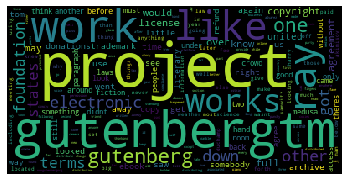

In [11]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()

If your word cloud image did not appear, go back and rework your `calculate_frequencies` function until you get the desired output.  Definitely check that you passed your frequecy count dictionary into the `generate_from_frequencies` function of `wordcloud`. Once you have correctly displayed your word cloud image, you are all done with this project. Nice work!